In [1]:
from sklearn.utils import shuffle
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets

In [2]:
iris_df = datasets.load_iris()

In [3]:
#Select features and target for the sake of medium article
X = iris_df['data'][:,:2]
y = (iris_df['target']!=0)*1

In [4]:
y = np.where(y==0, -1, 1)

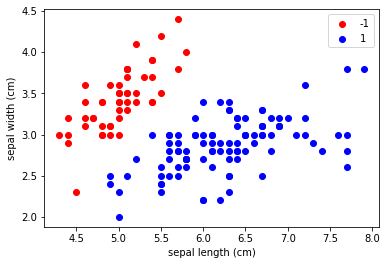

In [5]:
cut_point = (y==-1).sum()
plt.scatter(X[:cut_point,0], X[:cut_point,1], color ='red')
plt.scatter(X[cut_point:,0], X[cut_point:,1], color ='blue')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend([-1,1])
plt.show()

In [6]:
class SupportVectorMachine():
    def __init__(self, 
                 learning_rate = 0.001, 
                 lambda_param = 0.01 , 
                 n_tiers=10000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.iteration=n_tiers
        self.w = None
        self.b = None
        
    def _compute_gradient_descent():
        pass
        
    def fit(self, X, y):
        y_ = np.where(y>0, 1, -1)
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0 
        for _ in range(self.iteration):
            for idx, x_i in enumerate(X):
                condition =  y_[idx]*(np.dot(x_i, self.w)-self.b)>=1
                if condition:
                    self.w -= self.lr*(2*self.lambda_param*self.w)
                else:
                    self.w -= self.lr*(2*self.lambda_param*self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr*y_[idx]
        
    
    def predict(self, X):
        output = np.dot(X, self.w) - self.b
        return np.sign(output)

In [7]:
cl =SupportVectorMachine()

In [8]:
cl.fit(X,y)

In [9]:
preds = cl.predict(X)

In [10]:
#Accuracy
(preds==y).mean()

0.9933333333333333

In [11]:
#get coefficients including w and b
cl.b

3.170999999999762

In [12]:
cl.w

array([ 1.7257293 , -1.88390768])

In [13]:
x_d1 = 4
y_d1 =cl.b/cl.w[1] -cl.w[0]*x_d1/cl.w[1]
x_d2 = 7
y_d2 = cl.b/cl.w[1] -cl.w[0]*x_d2/cl.w[1]


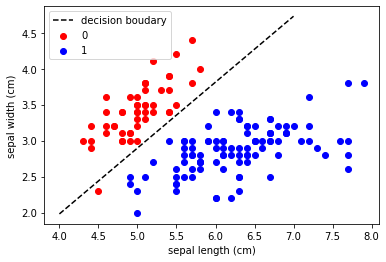

In [14]:
#Visualize the decision boudary
cut_point = (y==-1).sum()
plt.scatter(X[:cut_point,0], X[:cut_point,1], color ='red')
plt.scatter(X[cut_point:,0], X[cut_point:,1], color ='blue')
plt.plot([x_d1, x_d2], [y_d1, y_d2], '--', color ='black' )

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(['decision boudary', 0,1,])
plt.show()